## 필수 패키지 로드

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 읽기 및 조회

 - 상위 5개 샘플(행) 조회

In [4]:
df = pd.read_excel('../dataset/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


 - 샘플과 특성 개수 확인 (shape)

In [5]:
df.shape

(768, 10)

 - 아래 열 이름을 참고하여 df의 열 이름을 변경
 - ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [6]:
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


 - 정보를 조회

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


<br/>
<br/>
<br/>
<br/>

## 결측치 처리

In [8]:
df.isna().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

<br/>
<br/>
<br/>
<br/>

## 데이터 분석
 - df.hist()를 이용하여 히스토그램을 출력
 - hist의 옵션으로 figsize=(15,15), bins=10을 적용

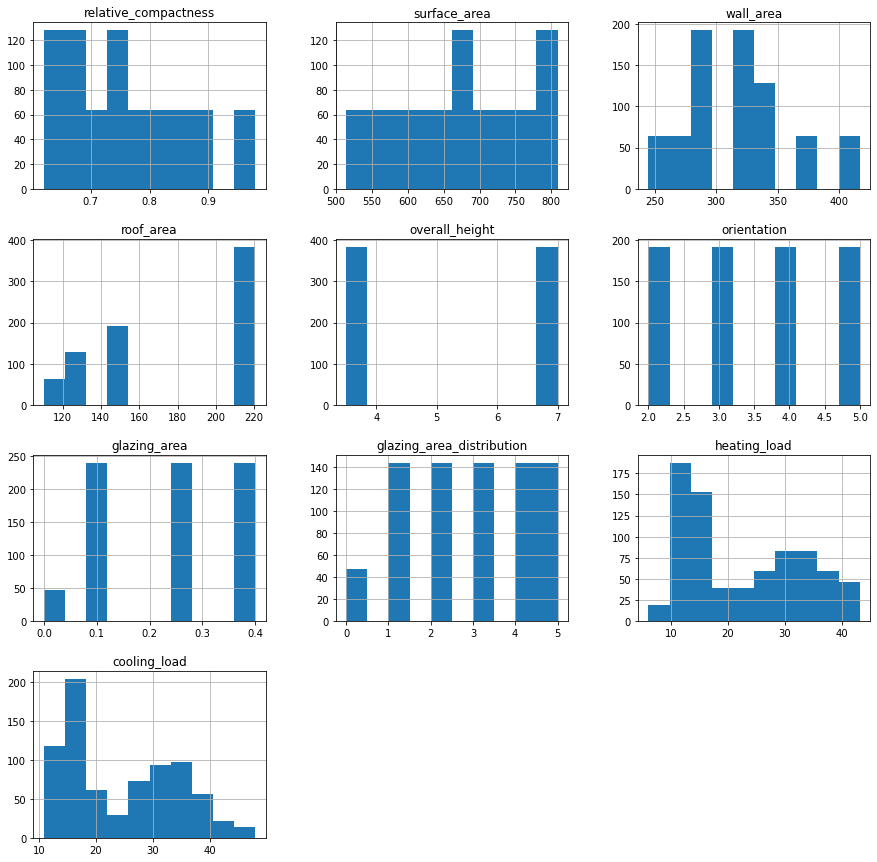

In [9]:
df.hist(figsize=(15, 15), bins=10)
plt.show()

 - 각 열의 이상치 존재 여부를 확인

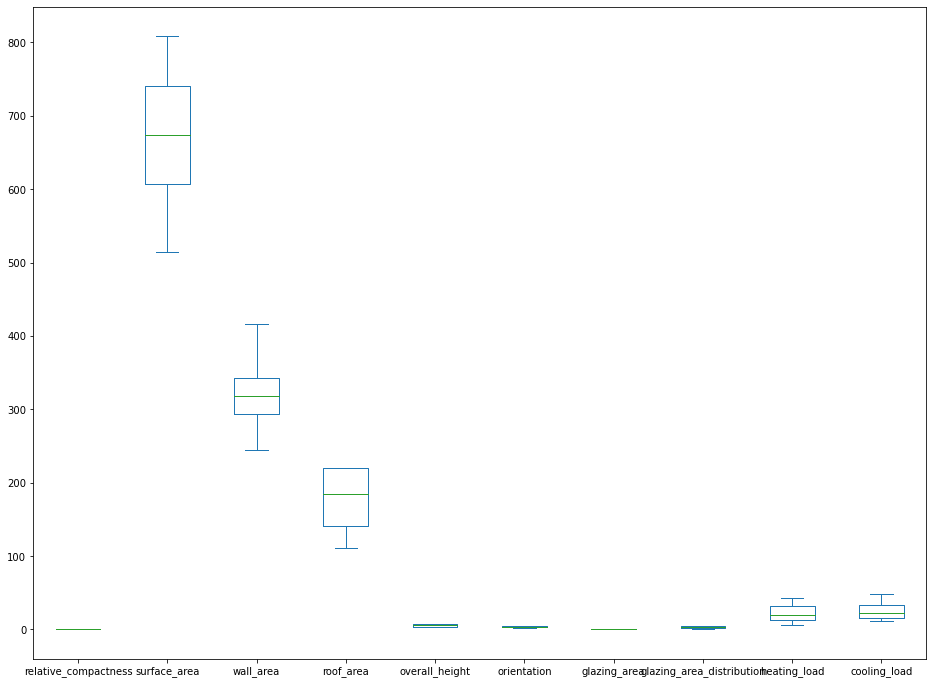

In [10]:
df.plot(kind='box', figsize=(16,12))
plt.show()

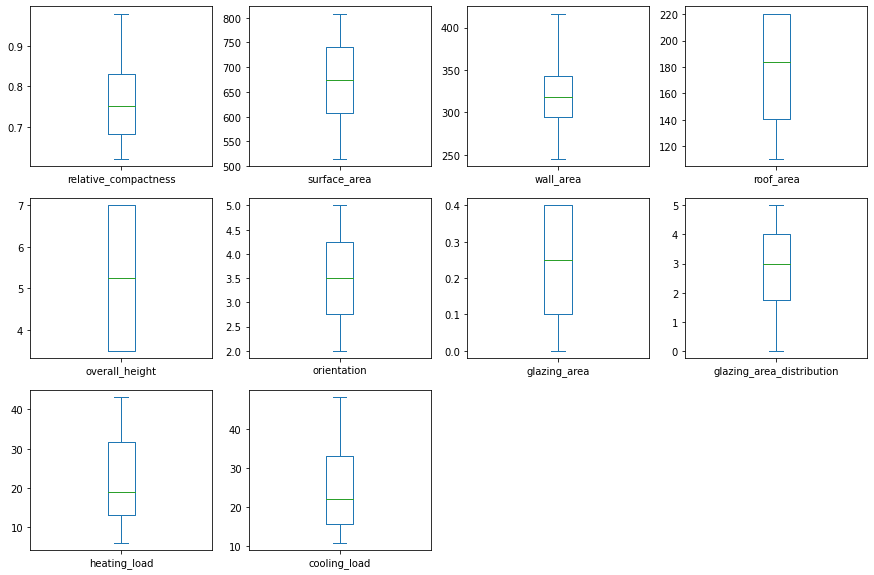

In [11]:
df.plot(kind='box', figsize=(15,10), subplots=True, layout=(3, 4))
plt.show()

 - 각 열 별 상관 관계를 출력
 

In [12]:
np.round(df.corr(), 3)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.000,-0.992,-0.204,-0.869,0.828,0.000,-0.000,-0.000,0.622,0.634
surface_area,-0.992,1.000,0.196,0.881,-0.858,-0.000,0.000,0.000,-0.658,-0.673
wall_area,-0.204,0.196,1.000,-0.292,0.281,-0.000,-0.000,0.000,0.456,0.427
roof_area,-0.869,0.881,-0.292,1.000,-0.973,-0.000,-0.000,-0.000,-0.862,-0.863
overall_height,0.828,-0.858,0.281,-0.973,1.000,0.000,0.000,-0.000,0.889,0.896
orientation,0.000,-0.000,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.003,0.014
glazing_area,-0.000,0.000,-0.000,-0.000,0.000,-0.000,1.000,0.213,0.270,0.208
glazing_area_distribution,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.213,1.000,0.087,0.051
heating_load,0.622,-0.658,0.456,-0.862,0.889,-0.003,0.270,0.087,1.000,0.976
cooling_load,0.634,-0.673,0.427,-0.863,0.896,0.014,0.208,0.051,0.976,1.000


 - 각 열 별 상관 관계 값을 히트맵으로 시각화
 - 컬러맵은 Greens, 값은 소수점 둘째자리까지 출력

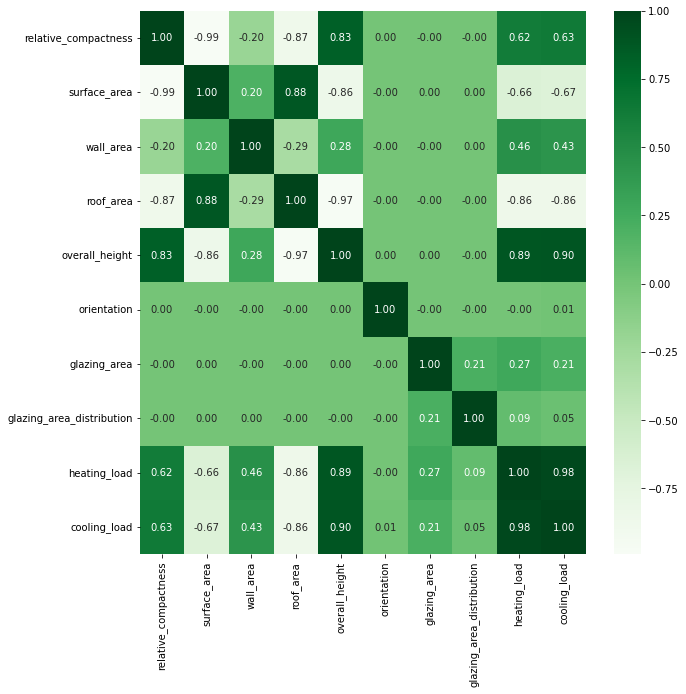

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

<br/>
<br/>
<br/>
<br/>

## 특성 공학
 - 종속 변수 headting load와 cooling load를 더해서 load 열을 생성

In [14]:
df['load'] = df['heating_load'] + df['cooling_load']
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12
...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,39.28
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,33.42
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,33.55
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,33.09


#### 상관관계가 0.97 이상인 특성들이 있는지 확인
 - relative_compactness와 surface_area의 열 별 상관관계를 소수점 셋째자리까지 출력

In [15]:
np.round(df.corr()[['relative_compactness', 'surface_area']], 3)

,relative_compactness,surface_area
relative_compactness,1.000,-0.992
surface_area,-0.992,1.000
wall_area,-0.204,0.196
roof_area,-0.869,0.881
overall_height,0.828,-0.858
orientation,0.000,-0.000
glazing_area,-0.000,0.000
glazing_area_distribution,-0.000,0.000
heating_load,0.622,-0.658
cooling_load,0.634,-0.673


 - roof_area와 overall_height의 열 별 상관관계를 소수점 셋째자리까지 출력

In [16]:
np.round(df.corr()[['roof_area', 'overall_height']], 3)

,roof_area,overall_height
relative_compactness,-0.869,0.828
surface_area,0.881,-0.858
wall_area,-0.292,0.281
roof_area,1.000,-0.973
overall_height,-0.973,1.000
orientation,-0.000,0.000
glazing_area,-0.000,0.000
glazing_area_distribution,-0.000,-0.000
heating_load,-0.862,0.889
cooling_load,-0.863,0.896


<br/>
<br/>
<br/>
<br/>

## 학습에 사용할 열 선택
 - Y = load 열
 - X = load, heating_load, cooling_load, relative_compactness, roof_area를 제외한 나머지 열

In [17]:
features = [
    #'relative_compactness', 나머지 열은 주석으로 처리해서 제거함
    'surface_area', 
    'wall_area', 
    #'roof_area',
    'overall_height',
    'orientation',
    'glazing_area',
    'glazing_area_distribution',
]

In [18]:
X = df[features]
Y = df['load']

 - X의 상위 5개 행을 출력

In [19]:
X.head()

,surface_area,wall_area,overall_height,orientation,glazing_area,glazing_area_distribution
0,514.5,294.0,7.0,2,0.0,0
1,514.5,294.0,7.0,3,0.0,0
2,514.5,294.0,7.0,4,0.0,0
3,514.5,294.0,7.0,5,0.0,0
4,563.5,318.5,7.0,2,0.0,0


 - Y의 상위 5개 행을 출력

In [20]:
Y.head()

0    36.88
1    36.88
2    36.88
3    36.88
4    49.12
Name: load, dtype: float64

<br/>
<br/>
<br/>
<br/>

## 데이터 분할
 - 데이터를 학습 및 평가 데이터로 분할하세요.
 - 분할 비율은 75:25입니다.
 - random_state=0으로 설정하세요.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.25)

 - 분할된 데이터의 shape을 출력하세요.

In [26]:
print('X Train Shape : ', X_train.shape)
print('X Test Shape : ', X_test.shape)
print('Y Train Shape : ', Y_train.shape)
print('Y Test Shape : ', Y_test.shape)

X Train Shape :  (576, 6)
X Test Shape :  (192, 6)
Y Train Shape :  (576,)
Y Test Shape :  (192,)


<br/>
<br/>
<br/>
<br/>

## 모델 생성 및 학습
 - LinearRegression 모델을 이용하여 모델링 후, 학습 및 성능평가지표를 출력하세요.

In [43]:
from sklearn.linear_model import LinearRegression


In [46]:
#모델생성
model = LinearRegression()

# 모델학습
model.fit(X_train, Y_train)
model.predict(X_test)
model.score(X_train, Y_train), model.score(X_test, Y_test)

(0.9079020943795573, 0.9023397984355199)

 - 학습된 모델의 회귀 계수(weight)와 절편(bias)을 출력하세요.

In [47]:
xx.coef_, xx.intercept_

(array([2.85401162e-02, 6.59087864e-02, 1.07227397e+01, 2.61067284e-02,
        3.41967461e+01, 1.84732663e-01]),
 -58.149839532465556)

<br/>
<br/>
<br/>
<br/>

## 모델 예측 및 평가
 - 전체 X 데이터의 예측 결과를 출력하세요.

In [53]:
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12
...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,39.28
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,33.42
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,33.55
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,33.09


In [55]:
pred = model.predict(X)
pred 

array([51.02262445, 51.04873117, 51.0748379 , 51.10094463, 54.0358554 ,
       54.06196213, 54.08806886, 54.11417559, 53.12032298, 53.14642971,
       53.17253644, 53.19864317, 55.4343211 , 55.46042783, 55.48653455,
       55.51264128, 57.74831921, 57.77442594, 57.80053267, 57.82663939,
       63.29184785, 63.31795458, 63.34406131, 63.37016804, 15.15813506,
       15.18424179, 15.21034852, 15.23645525, 17.47213317, 17.4982399 ,
       17.52434663, 17.55045336, 19.78613129, 19.81223802, 19.83834474,
       19.86445147, 22.1001294 , 22.12623613, 22.15234286, 22.17844958,
       24.41412751, 24.44023424, 24.46634097, 24.4924477 , 26.72812562,
       26.75423235, 26.78033908, 26.80644581, 54.62703172, 54.65313845,
       54.67924518, 54.70535191, 57.64026268, 57.66636941, 57.69247614,
       57.71858287, 56.72473026, 56.75083699, 56.77694372, 56.80305045,
       59.03872837, 59.0648351 , 59.09094183, 59.11704856, 61.35272649,
       61.37883322, 61.40493994, 61.43104667, 66.89625513, 66.92

- 예측 결과를 load_pred로 df에 추가하세요.

In [56]:
df['load_pred'] = pred
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,load,load_pred
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,51.022624
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,51.048731
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,51.074838
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,51.100945
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,54.035855
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,39.28,39.094809
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,33.42,41.330487
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,33.55,41.356594
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,33.09,41.382701


 - 실제 냉난방 로드와 예측 로드의 R-squared, MSE, MAE를 각각 출력하세요.

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Load')
# print('R squared : ', r2_score())
print('Mean Squared Error: ', mean_squared_error(y_train))
# print('Mean Absolute Error: ', mean_absolute_error())

Load


NameError: name 'y_train' is not defined

<br/>
<br/>
<br/>
<br/>

### 파이프라인 구축결과 시각화 하기

1. 오늘 배운 PolynominalFeatue를 추가해서 성능을 향상해 봅니다.
2. Polynominal, 다항회귀로 차수가 높아짐에 따라서 Overfitting 발생, 이를 Regulization(규제) 으로 제어합니다.
3.  전처리 추가시 PipeLine 사용하고 최종적인 Error를 간단한 Bar그래프로 시각화 합니다.

In [64]:
ridge, elasticnet 사용, pipe_line 안에 standardization사용

SyntaxError: invalid syntax (Temp/ipykernel_10756/2764037901.py, line 1)

In [65]:
from sklearn.linear_model import Ridge, ElasticNet
import seaborn as sns

In [71]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train, Y_train)
pred = ridge.predict(X_test)
pred

array([36.35347668, 19.00387917, 61.56699557, 55.49220957, 64.90611306,
       57.90826633, 59.99361012, 69.4751505 , 62.3011416 , 59.59765254,
       17.55708921, 71.65619007, 26.50222476, 71.81539455, 72.37174609,
       57.33614659, 21.52957373, 57.72281582, 36.09521581, 26.41583064,
       28.91527917, 65.09156357, 21.45083563, 66.66494903, 15.24309119,
       31.54003013, 30.97101632, 29.75613761, 21.15867271, 67.22130056,
       31.10397477, 31.25552323, 71.97459903, 31.07007272, 60.1528146 ,
       72.39517031, 29.38523659, 72.76607133, 40.66306376, 24.42034516,
       26.10507771, 66.7174411 , 33.72106971, 64.61513962, 53.12571949,
       55.02861511, 21.90047476, 28.96777124, 58.25292132, 67.6107916 ,
       65.11780961, 30.57386927, 67.53515943, 36.69813167, 72.58062082,
       18.84467469, 51.05613058, 64.2442386 , 67.11458815, 34.25117521,
       36.37972271, 26.38958461, 65.30326012, 19.5602307 , 26.23038013,
       24.2610371 , 66.74368713, 24.13573468, 57.5215971 , 66.92

#### 작업하신 결과물을 Mattermost 사이트 개인 메세지로 올려주시기 바랍니다.